In [ ]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
retail_dataset = pd.read_csv(r"C:\Users\BJ\Desktop\Dataset\Csv\uci_online_re.csv")
df = retail_dataset.copy()

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#checking null values
df.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [ ]:
#dropping null records
df.dropna(subset=['Customer ID', 'Description'], axis=0, inplace=True)

In [ ]:
#checking duplicate values
df.duplicated().sum()

5226

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [ ]:
#standardizing date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#creating month column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df.head(10)

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,2010-12-01
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,2010-12-01
7,7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,2010-12-01
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,2010-12-01
9,9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01,4.25,13047.0,United Kingdom,2010-12-01


In [ ]:
#creating cohort month
df['Cohort Month'] = df.groupby('Customer ID')['InvoiceMonth'].transform('min')
df

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Cohort Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
401599,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01,2011-08-01
401600,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01
401601,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01
401602,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011-12-01,2011-08-01


In [ ]:
#creating cohort index (Active Month)
df['Active Month'] = (((df['InvoiceDate'].dt.year - df['Cohort Month'].dt.year) *12) + (df['InvoiceDate'].dt.month - df['Cohort Month'].dt.month)) + 1
df

,index,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,Cohort Month,Active Month
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
401599,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,2011-12-01,2011-08-01,5
401600,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,5
401601,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,2011-12-01,2011-08-01,5
401602,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [ ]:
cohort_pivot = df.pivot_table(index='Cohort Month', columns='Active Month', values='Customer ID', aggfunc=lambda x:x.nunique())
cohort_pivot

Active Month,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#getting cohorts
cohort = cohort_pivot.iloc[:,0]

In [17]:
cohort_pivot_2 = cohort_pivot.divide(cohort, axis=0)
cohort_pivot_2 = cohort_pivot_2.map(lambda x:x*100).round(0)

In [18]:
cohort_pivot_2.index = cohort_pivot_2.index.strftime('%B')

In [19]:
cohort_pivot_2

Active Month,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
December,100.0,38.0,33.0,39.0,36.0,40.0,38.0,35.0,35.0,39.0,37.0,50.0,27.0
January,100.0,24.0,28.0,24.0,33.0,30.0,26.0,26.0,31.0,35.0,37.0,15.0,NaN
February,100.0,25.0,19.0,28.0,27.0,25.0,26.0,28.0,26.0,31.0,9.0,NaN,NaN
March,100.0,19.0,25.0,22.0,23.0,18.0,26.0,24.0,29.0,9.0,NaN,NaN,NaN
April,100.0,23.0,22.0,21.0,21.0,24.0,23.0,26.0,8.0,NaN,NaN,NaN,NaN
May,100.0,24.0,17.0,17.0,22.0,24.0,27.0,10.0,NaN,NaN,NaN,NaN,NaN
June,100.0,21.0,19.0,27.0,25.0,34.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
July,100.0,21.0,20.0,23.0,27.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August,100.0,25.0,25.0,25.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


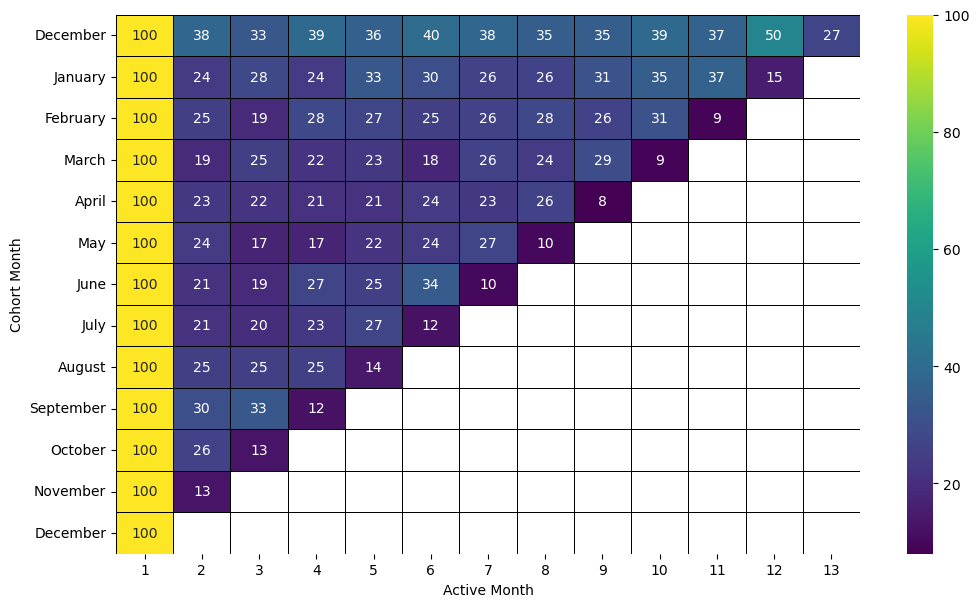

In [ ]:
#ploting Heatmap

plt.figure(figsize=(12, 7))
sns.heatmap(data=cohort_pivot_2, annot=True, cmap='viridis', fmt='.0f', linecolor='k', linewidths='0.5')
plt.show()